In [1]:
%load_ext autoreload
%autoreload 2

# Atention

## Output in plane coordinates, not Earth. Convert it.

In [486]:
from Satellite import Satellite
from SatelliteState import SatelliteState
from Earth import Earth
import utilities

import numpy as np

import matplotlib.pyplot as plt

earth_radius = 6378136.6/2

init_r = earth_radius+300000



angular_vel = 0.0010830807404 #600000
# angular_vel = 0.001454 # ISS
# angular_vel = 0.0010830807304   # Perfect orbit @ 600000
# angular_vel = 0.00045844478  #6000000


tang_vel = angular_vel * init_r
tang_vel = 10650
#tang_vel = 60 * 4.848e-6 * init_r

sat_state = SatelliteState(np.array([init_r, np.pi/2, 0]), np.array([0]), np.array([0, tang_vel, 0]), np.array([0]))

earth = Earth()


sat1 = Satellite(sat_state, 0, earth=earth)

In [487]:
tang_vel

10650

In [488]:
sol = sat1.simulate(10000000)

In [489]:
sol

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  1.000e+00 ...  1.178e+03  1.179e+03]
        y: [[ 3.489e+06  3.489e+06 ...  1.528e+05  6.969e+04]
            [ 0.000e+00 -2.352e-01 ... -6.986e+04 -1.054e+05]
            [ 1.571e+00  1.574e+00 ...  5.167e+00  5.170e+00]
            [ 1.065e+04  1.065e+04 ...  4.664e+02  2.127e+02]]
      sol: None
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]
     nfev: 608
     njev: 0
      nlu: 0

In [490]:
sol.y[0]

array([3489068.3       , 3489068.18238059, 3489067.82951908, ...,
        216017.69342552,  152795.96433888,   69685.67440645])

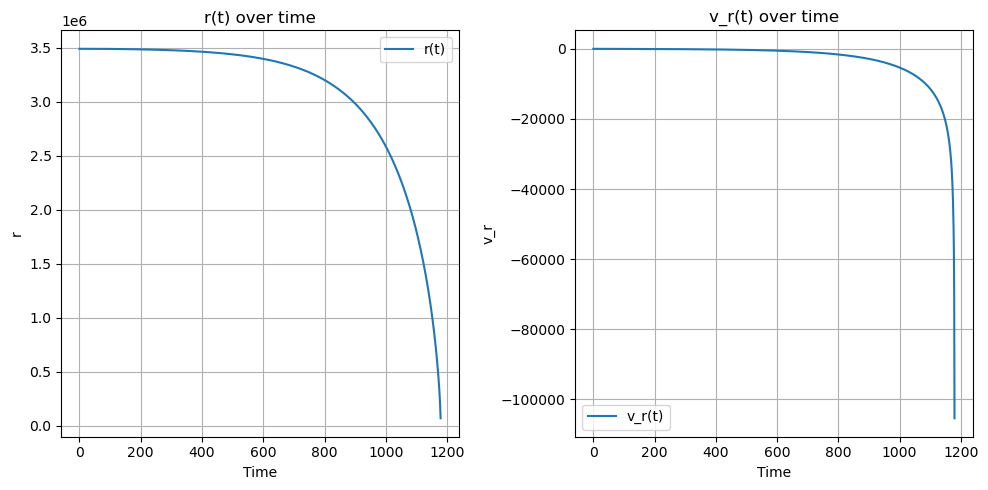

In [491]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='r(t)')
plt.title('r(t) over time')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='v_r(t)')
plt.title('v_r(t) over time')
plt.xlabel('Time')
plt.ylabel('v_r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

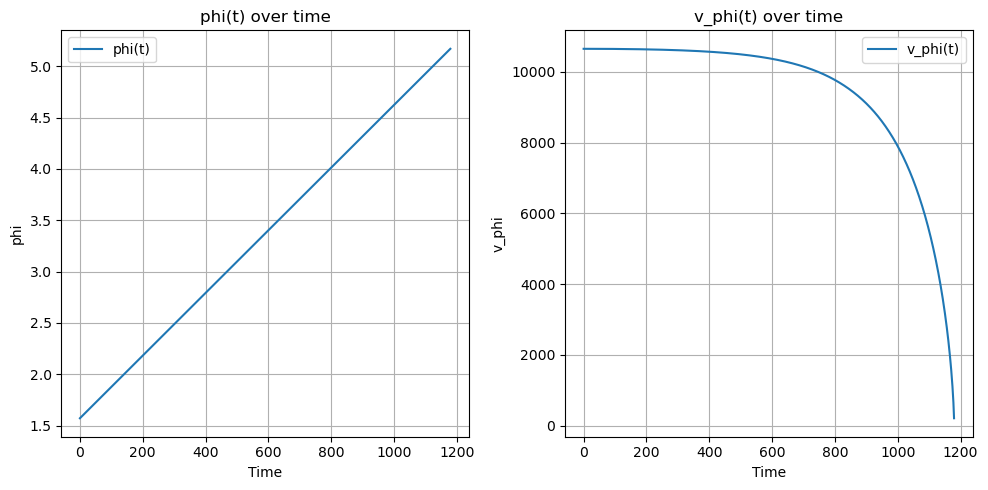

In [492]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[2], label='phi(t)')
plt.title('phi(t) over time')
plt.xlabel('Time')
plt.ylabel('phi')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[3], label='v_phi(t)')
plt.title('v_phi(t) over time')
plt.xlabel('Time')
plt.ylabel('v_phi')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

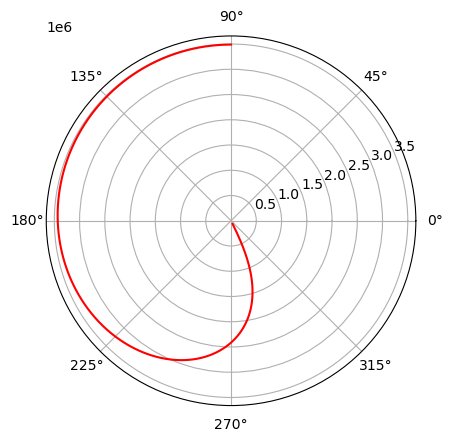

In [493]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

#n=np.argmin(np.abs(sol.y[0]-earth_radius))

R = sol.y[0][:]
rad = sol.y[2][:]
Phi = [np.pi/2 for i in rad]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(rad, R, c='r')

plt.show()

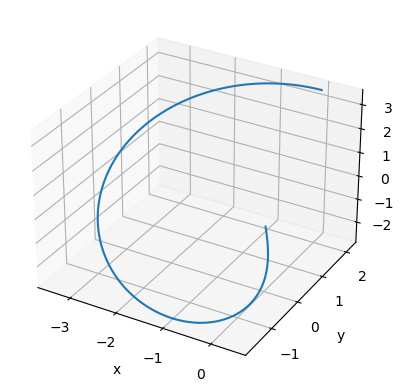

In [494]:
X = R*np.sin(rad)*np.cos(Phi)
Y = R*np.sin(rad)*np.sin(Phi)
Z = R*np.cos(rad)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(Z,
    X, Y)

r = earth_radius
# Generate data for the sphere
#u = np.linspace(0, 2 * np.pi, 100)
#v = np.linspace(0, np.pi, 100)
#x = r * np.outer(np.cos(u), np.sin(v))
#y = r * np.outer(np.sin(u), np.sin(v))
#z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere with semi-transparency
#ax.plot_surface(x, y, z, color='r', alpha=0.4)  # Adjust color and transparency

#ax.set_aspect('equal')
ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
plt.show()

In [418]:
import plotly.graph_objects as go
import numpy as np

# Create the figure
fig = go.Figure()


# Add the trajectory as a scatter3D trace
fig.add_trace(go.Scatter3d(x=X, y=Y, z=Z,
                           mode='lines',
                           line=dict(color='blue', width=2),
                           name='Trajectory'))

# Sphere (earth) data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v)).flatten()
y = earth_radius * np.outer(np.sin(u), np.sin(v)).flatten()
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v)).flatten()

# Add the sphere as a mesh3D trace
fig.add_trace(go.Mesh3d(x=x, y=y, z=z, color='red', opacity=0.4, alphahull=0))

# Update the layout for a better view
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    xaxis=dict(nticks=4, range=[-2*R, 2*R]),
                    yaxis=dict(nticks=4, range=[-2*R, 2*R]),
                    zaxis=dict(nticks=4, range=[-2*R, 2*R]),
                    ),
                  width=700,
                  margin=dict(r=20, l=10, b=10, t=10))

# Show the plot
fig.show()


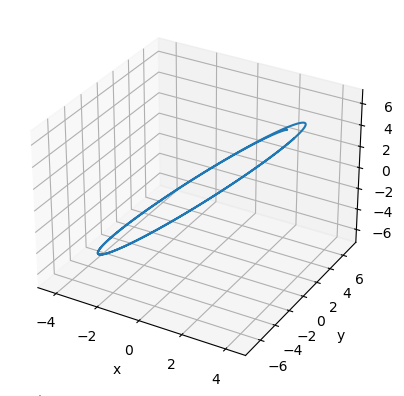

In [375]:
X, Y, Z = X, Z, Y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(
    X, Y, Z)

ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
#ax.set_aspect('equal')
plt.show()

In [28]:
import plotly.graph_objects as go

In [32]:
fig = go.Figure()

# Generate a sphere (Earth)
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = earth_radius * np.sin(theta) * np.cos(phi)
y = earth_radius * np.sin(theta) * np.sin(phi)
z = earth_radius * np.cos(theta)

# Plot Earth
fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Blues', opacity=0.6, showscale=False))

# Plot Satellite Path
fig.add_trace(go.Scatter3d(x=R, y=Y, z=Z, mode='lines', line=dict(color='red', width=2)))

fig.update_layout(
    title="Satellite Trajectory around the Earth",
    scene=dict(
        xaxis=dict(nticks=4, range=[-7000, 7000], title='X (km)'),
        yaxis=dict(nticks=4, range=[-7000, 7000], title='Y (km)'),
        zaxis=dict(nticks=4, range=[-7000, 7000], title='Z (km)'),
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    scene_camera=dict(
        eye=dict(x=1.5, y=1.5, z=1.5)
    )
)

fig.show()